# Principal Component Analysis (PCA) for Stocks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data
import yfinance as yf
yf.pdr_override() 


In [2]:
# input
symbols = ['AAPL','MSFT','AMD','NVDA','GE']
start = '2012-01-01'
end = '2019-09-11'

# Read data 
dataset = yf.download(symbols,start,end)['Adj Close']

# View Columns
dataset.head()

[*********************100%***********************]  5 of 5 completed


,AAPL,AMD,GE,MSFT,NVDA
Date,,,,,
2012-01-03,12.629209,5.48,13.900859,21.749044,12.904101
2012-01-04,12.697079,5.46,14.052279,22.260885,13.051156
2012-01-05,12.838044,5.46,14.044711,22.488358,13.519892
2012-01-06,12.972249,5.43,14.120420,22.837715,13.363647
2012-01-09,12.951672,5.59,14.279417,22.537107,13.363647


In [4]:
#Arrange the data in ascending order
dataset = dataset.iloc[::-1]
print(dataset.round(2)

SyntaxError: unexpected EOF while parsing (<ipython-input-4-beaadeaa70dc>, line 3)

In [5]:
#Compute stock returns and print the returns in percentage format
stock_ret = dataset.pct_change()[1:]
print(stock_ret.round(4)*100)

            AAPL   AMD    GE  MSFT  NVDA
Date                                    
2012-01-04  0.54 -0.36  1.09  2.35  1.14
2012-01-05  1.11  0.00 -0.05  1.02  3.59
2012-01-06  1.05 -0.55  0.54  1.55 -1.16
2012-01-09 -0.16  2.95  1.13 -1.32  0.00
2012-01-10  0.36  2.15 -0.74  0.36 -0.41
...          ...   ...   ...   ...   ...
2019-09-04  1.70  0.16  5.64  1.17  2.80
2019-09-05  1.96  1.78  0.11  1.76  6.51
2019-09-06 -0.01 -2.98 -1.14 -0.68 -0.61
2019-09-09  0.43 -0.20  2.87 -1.14  1.04
2019-09-10  1.18 -0.89  2.01 -1.05  1.48

[1933 rows x 5 columns]


In [9]:
from sklearn.decomposition import PCA
num_pc = 4

X = np.asarray(stock_ret)
[n,m] = X.shape
print('The number of timestamps is {}.'.format(n))
print('The number of stocks is {}.'.format(m))

pca = PCA(n_components=num_pc) # number of principal components
pca.fit(X)

percentage = pca.explained_variance_ratio_
percentage_cum = np.cumsum(percentage)
print('{0:.2f}% of the variance is explained by the first 4 PCA'.format(percentage_cum[-1]*100))

The number of timestamps is 1933.
The number of stocks is 5.
95.32% of the variance is explained by the first 4 PCA


In [12]:
pca_components = pca.components_

(50.0, 100.0)

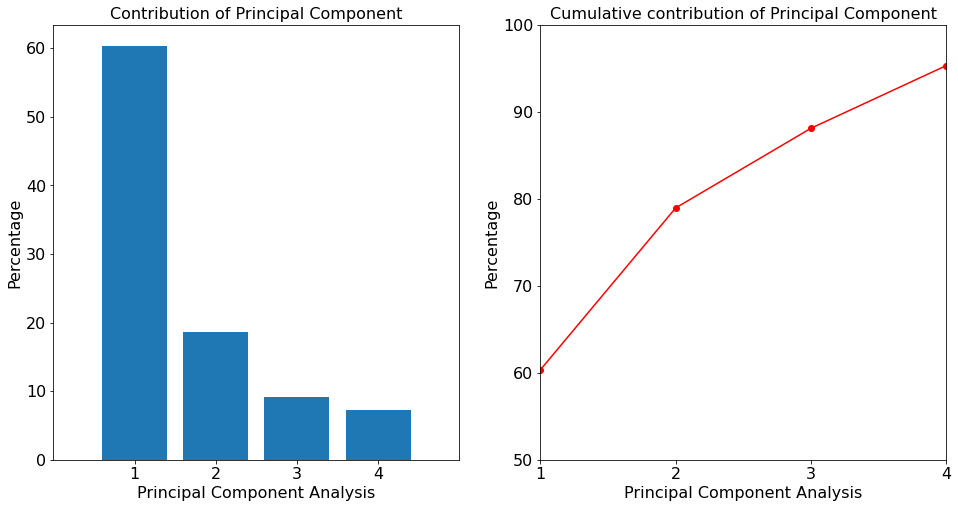

In [13]:
x = np.arange(1,len(percentage)+1,1)

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.bar(x, percentage*100, align = "center")
plt.title('Contribution of Principal Component',fontsize = 16)
plt.xlabel('Principal Component Analysis',fontsize = 16)
plt.ylabel('Percentage',fontsize = 16)
plt.xticks(x,fontsize = 16) 
plt.yticks(fontsize = 16)
plt.xlim([0, num_pc+1])

plt.subplot(1, 2, 2)
plt.plot(x, percentage_cum*100,'ro-')
plt.xlabel('Principal Component Analysis',fontsize = 16)
plt.ylabel('Percentage',fontsize = 16)
plt.title('Cumulative contribution of Principal Component',fontsize = 16)
plt.xticks(x,fontsize = 16) 
plt.yticks(fontsize = 16)
plt.xlim([1, num_pc])
plt.ylim([50,100])

(50.0, 100.0)

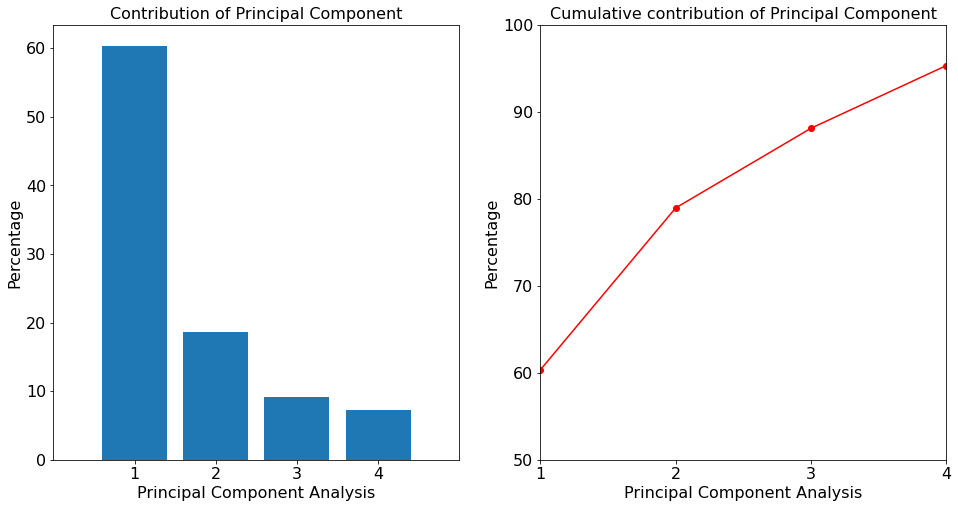

In [14]:
x = np.arange(1,len(percentage)+1,1)

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.bar(x, percentage*100, align = "center")
plt.title('Contribution of Principal Component',fontsize = 16)
plt.xlabel('Principal Component Analysis',fontsize = 16)
plt.ylabel('Percentage',fontsize = 16)
plt.xticks(x,fontsize = 16) 
plt.yticks(fontsize = 16)
plt.xlim([0, num_pc+1])

plt.subplot(1, 2, 2)
plt.plot(x, percentage_cum*100,'ro-')
plt.xlabel('Principal Component Analysis',fontsize = 16)
plt.ylabel('Percentage',fontsize = 16)
plt.title('Cumulative contribution of Principal Component',fontsize = 16)
plt.xticks(x,fontsize = 16) 
plt.yticks(fontsize = 16)
plt.xlim([1, num_pc])
plt.ylim([50,100])

In [15]:
# Statistical risk factors
factor_returns = X.dot(pca_components.T)
factor_returns = pd.DataFrame(columns=["factor 1", "factor 2", "factor 3","factor 4"], 
                              index=stock_ret.index,
                              data=factor_returns)
factor_returns.head()

,factor 1,factor 2,factor 3,factor 4
Date,,,,
2012-01-04,0.006504,-0.022018,-0.008959,0.000844
2012-01-05,0.016353,-0.032816,0.012070,-0.005211
2012-01-06,-0.004655,-0.004004,-0.018963,-0.007374
2012-01-09,0.025639,0.014853,-0.003058,0.012073
2012-01-10,0.017913,0.012002,-0.001013,-0.009194


In [16]:
factor_exposures = pd.DataFrame(index=["Portfolio 1", "Portfolio 2", "Portfolio 3","Portfolio 4"], 
                                columns=stock_ret.columns,
                                data = pca.components_).T

In [17]:
factor_exposures

,Portfolio 1,Portfolio 2,Portfolio 3,Portfolio 4
AAPL,0.153789,-0.338901,-0.510221,-0.621245
AMD,0.897101,0.441358,-0.018315,-0.007312
GE,0.121538,-0.258504,-0.599541,0.740490
MSFT,0.145864,-0.320676,-0.260085,-0.225290
NVDA,0.368118,-0.721590,0.558790,0.122145


In [18]:
labels = factor_exposures.index
data = factor_exposures.values

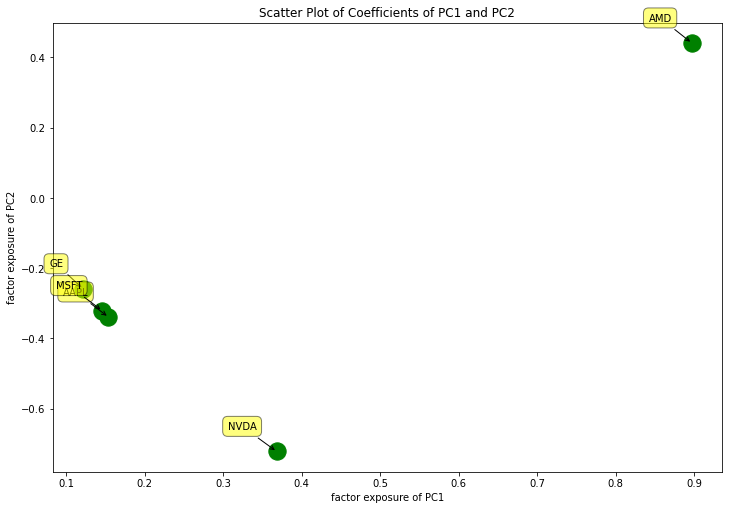

In [29]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    data[:, 0], data[:, 1], marker='o', s=300, c='g',
    cmap=plt.get_cmap('Spectral'))
plt.title('Scatter Plot of Coefficients of PC1 and PC2')
plt.xlabel('factor exposure of PC1')
plt.ylabel('factor exposure of PC2')

for label, x, y in zip(labels, data[:, 0], data[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    )

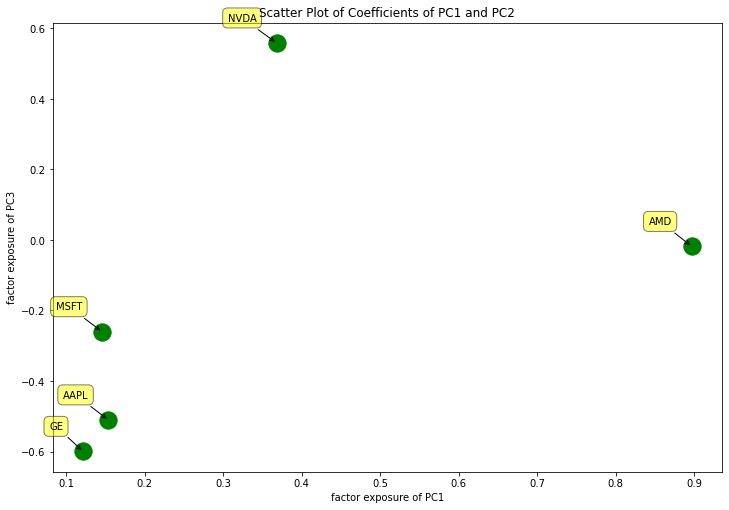

In [30]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    data[:, 0], data[:, 2], marker='o', s=300, c='g',
    cmap=plt.get_cmap('Spectral'))
plt.title('Scatter Plot of Coefficients of PC1 and PC2')
plt.xlabel('factor exposure of PC1')
plt.ylabel('factor exposure of PC3')

for label, x, y in zip(labels, data[:, 0], data[:, 2]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    )

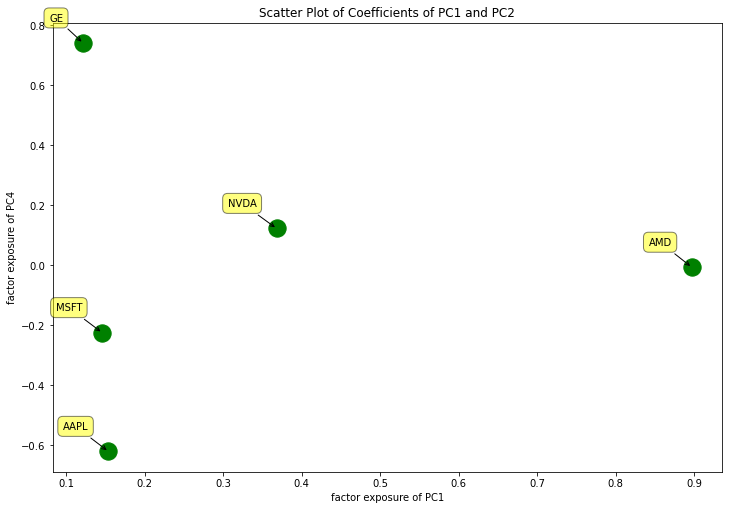

In [31]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    data[:, 0], data[:, 3], marker='o', s=300, c='g',
    cmap=plt.get_cmap('Spectral'))
plt.title('Scatter Plot of Coefficients of PC1 and PC2')
plt.xlabel('factor exposure of PC1')
plt.ylabel('factor exposure of PC4')

for label, x, y in zip(labels, data[:, 0], data[:, 3]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    )

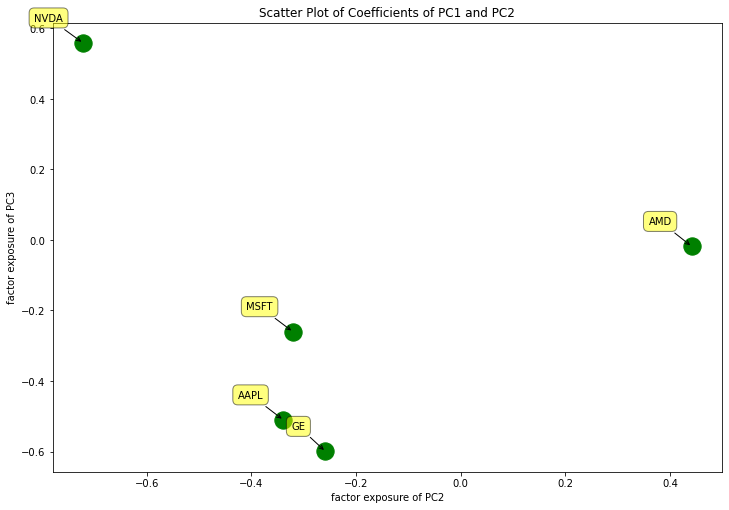

In [32]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    data[:, 1], data[:, 2], marker='o', s=300, c='g',
    cmap=plt.get_cmap('Spectral'))
plt.title('Scatter Plot of Coefficients of PC1 and PC2')
plt.xlabel('factor exposure of PC2')
plt.ylabel('factor exposure of PC3')

for label, x, y in zip(labels, data[:, 1], data[:, 2]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    )


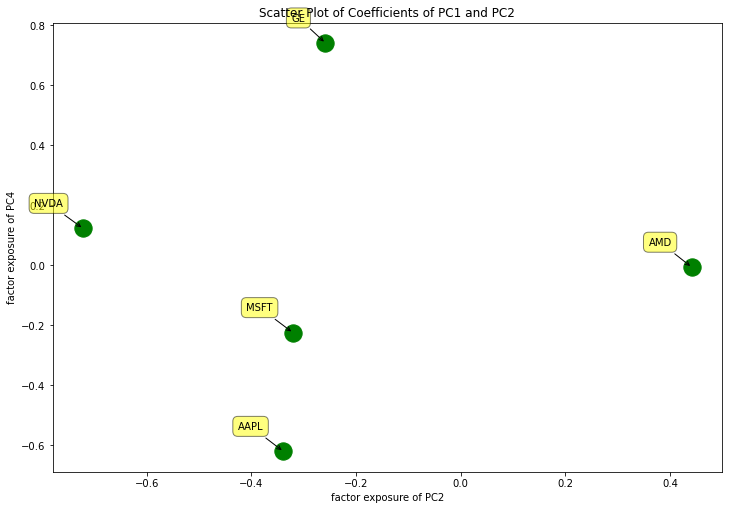

In [33]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    data[:, 1], data[:, 3], marker='o', s=300, c='g',
    cmap=plt.get_cmap('Spectral'))
plt.title('Scatter Plot of Coefficients of PC1 and PC2')
plt.xlabel('factor exposure of PC2')
plt.ylabel('factor exposure of PC4')

for label, x, y in zip(labels, data[:, 1], data[:, 3]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    )

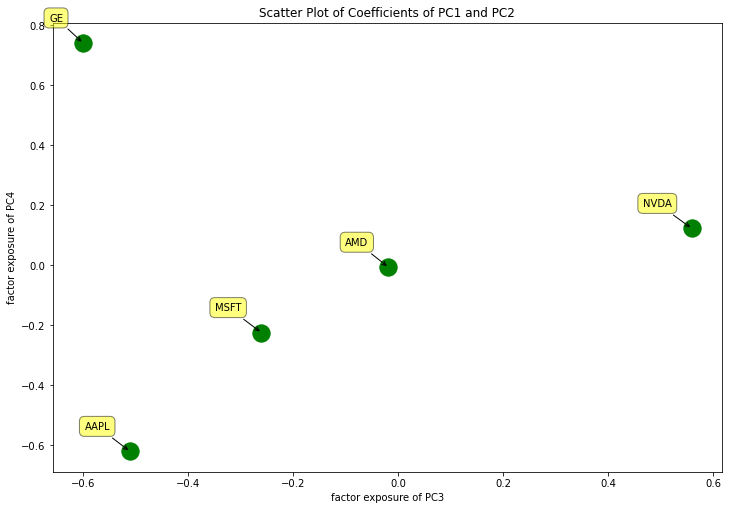

In [34]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    data[:, 2], data[:, 3], marker='o', s=300, c='g',
    cmap=plt.get_cmap('Spectral'))
plt.title('Scatter Plot of Coefficients of PC1 and PC2')
plt.xlabel('factor exposure of PC3')
plt.ylabel('factor exposure of PC4')

for label, x, y in zip(labels, data[:, 2], data[:, 3]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    )